# Heavy Traffic Indicators I-94 

### We are going to analyze the I-94 dataset, so we can figure out how traffic is westbound.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [5]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,10/2/2012 9:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,10/2/2012 10:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 11:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 12:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,10/2/2012 13:00,4918


In [6]:
traffic.tail()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,9/30/2018 19:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,9/30/2018 20:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,9/30/2018 21:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,9/30/2018 22:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,9/30/2018 23:00,954


In [7]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


We are going to create a histogram to get a gist of how traffic is going westbound on I-94

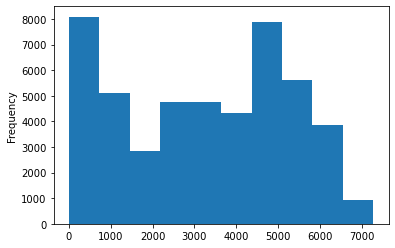

In [8]:
%matplotlib inline
traffic['traffic_volume'].plot.hist()
plt.show()

In [9]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Looks like from the histogram and describe(), we can say that 25% of the time there is less than or equal to 1193 cars and 25% of the time there is more than or equal to 4933 cars

In [10]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [11]:
traffic_day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)] 

In [12]:
traffic_night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]

We have changed the 'date_time' column to date time and have made it display by the hour. Then, we split the data from day time (7am to 7pm) to night time (7pm - 7am).

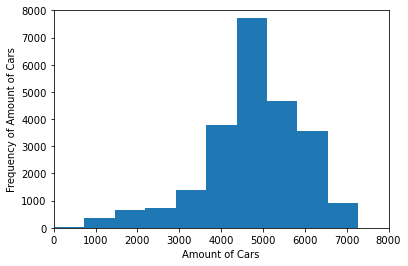

In [13]:
traffic_day['traffic_volume'].plot.hist()
plt.xlabel('Amount of Cars')
plt.ylabel('Frequency of Amount of Cars')
plt.xlim(0, 8000)
plt.ylim(0, 8000)
plt.show()

In [14]:
traffic_day['traffic_volume'].describe()


count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

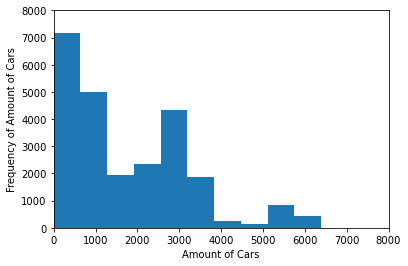

In [15]:
traffic_night['traffic_volume'].plot.hist()
plt.xlabel('Amount of Cars')
plt.ylabel('Frequency of Amount of Cars')
plt.xlim(0, 8000)
plt.ylim(0, 8000)
plt.show()

In [16]:
traffic_night['traffic_volume'].describe()


count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Looking at the graphs and the describe function, the data can be interpreted as traffic at night tends to be much less than traffic during the day. Traffic during the day has a mean of 4762 cars while traffic at night has a mean of 1785 cars. If we are going to look into heavy traffic, we can concentrate on the traffic during the day. 

In [17]:
traffic_day['month'] = traffic_day['date_time'].dt.month

In [18]:
traffic_by_month = traffic_day.groupby('month').mean()

In [19]:
traffic_by_month

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609
6,294.576068,0.271121,0.000000,48.612374,4898.019566
7,296.785052,4.412258,0.000000,42.176619,4595.035744
8,295.119191,0.228113,0.000000,42.556892,4928.302035
9,292.520287,0.289807,0.000000,45.184112,4870.783145


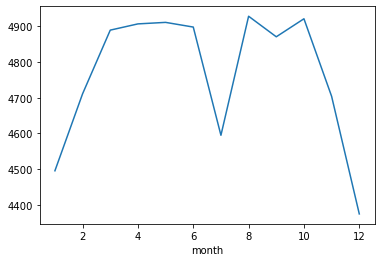

In [20]:
traffic_by_month['traffic_volume'].plot.line()
plt.show()

Traffic tends to consistently be above 4300 for every month, however traffic is the highest during the months of March to June and August to November. The months of January, July, and December seem to be the lowest. It may be due to weather as there is less traffic during colder months such as December to February. Wile the explanation for July could be that there are multiple vacations during those times that take employees away from driving during those months as well as students no longer having school. 

In [22]:
traffic_day['dayofweek'] = traffic_day['date_time'].dt.dayofweek
traffic_dow = traffic_day.groupby('dayofweek').mean()

In [23]:
traffic_dow

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month
dayofweek,,,,,,
0,282.262755,2.923823,0.000017,57.508053,4893.551286,6.401243
1,282.301770,0.129172,0.000194,52.333234,5189.004782,6.458757
2,282.198316,0.068099,0.001091,53.662119,5284.454282,6.619158
3,282.279115,0.172436,0.000148,53.993191,5311.303730,6.501184
4,282.181216,0.092828,0.000225,51.412200,5291.600829,6.575067
5,282.300646,0.107596,0.000094,50.446376,3927.249558,6.498821
6,282.280340,0.133170,0.000000,52.288699,3436.541789,6.604179


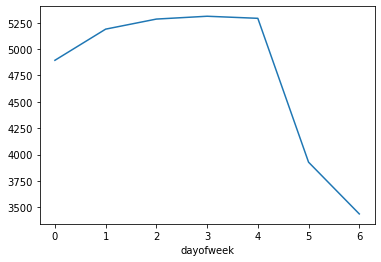

In [24]:
traffic_dow['traffic_volume'].plot.line()
plt.show()

Traffic tends to be the most during work weeks while during weekends it dies down by about a 1000 - 1500 cars. This would make sense since this would mean there is no work rush hour due to companies being closed on weekends.

In [25]:
traffic_day['hour'] = traffic_day['date_time'].dt.hour
business_day = traffic_day[traffic_day['dayofweek'] <= 4]
weekend_day = traffic_day[traffic_day['dayofweek'] >= 5]
business_by_hour = business_day.groupby('hour').mean()
weekend_by_hour = weekend_day.groupby('hour').mean()

In [27]:
business_by_hour

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek
hour,,,,,,,
7,278.662639,0.145105,0.000068,50.538983,6030.413559,6.363390,1.984407
8,278.938443,0.144614,0.000135,53.666441,5503.497970,6.567659,1.989175
9,279.628421,0.156829,0.000139,53.619709,4895.269257,6.484386,1.981263
10,280.664650,0.113984,0.000033,54.781417,4378.419118,6.481283,1.957888
11,281.850231,0.151976,0.000000,52.808876,4633.419470,6.448819,1.979957
12,282.832763,0.090271,0.001543,53.855714,4855.382143,6.569286,1.989286
13,283.292447,0.092433,0.000370,53.325444,4859.180473,6.465237,1.982988
14,284.091787,0.102991,0.000746,55.326531,5152.995778,6.588318,1.990852
15,284.450605,0.090036,0.000274,54.168467,5592.897768,6.541397,1.962563


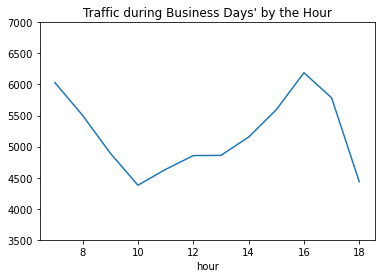

In [39]:
business_by_hour['traffic_volume'].plot.line()
plt.ylim(3500, 7000)
plt.title('Traffic during Business Days\' by the Hour')
plt.show()


In [29]:
weekend_by_hour

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek
hour,,,,,,,
7,278.095331,0.291540,0.000000,50.006623,1589.365894,6.518212,5.501656
8,277.981017,0.083870,0.000083,48.877076,2338.578073,6.523256,5.503322
9,279.785660,0.075234,0.000364,49.688042,3111.623917,6.603120,5.492201
10,280.403811,0.079674,0.000103,48.915808,3686.632302,6.491409,5.503436
11,282.129355,0.141387,0.000000,52.372973,4044.154955,6.482883,5.491892
12,282.936119,0.095784,0.000000,51.418018,4372.482883,6.500901,5.493694
13,283.784951,0.180452,0.000000,53.095841,4362.296564,6.580470,5.497288
14,284.663261,0.087847,0.000000,52.735401,4358.543796,6.644161,5.500000
15,284.854578,0.074771,0.000000,52.148624,4342.456881,6.612844,5.506422


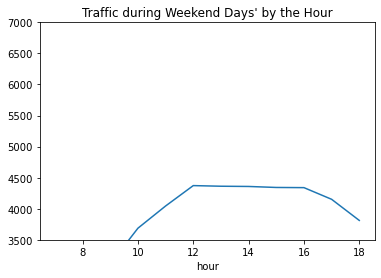

In [40]:
weekend_by_hour['traffic_volume'].plot.line()
plt.ylim(3500, 7000)
plt.title('Traffic during Weekend Days\' by the Hour')
plt.show()

By isolating the weekdays, we can see that rush hour tends be around 7 and 16. During these times, the traffic volume eclipses 6000 and the weekday graph displays the marginal traffic difference compared to the weekends.

In [47]:
corr_traffic_day = traffic_day.corr().loc[:, 'traffic_volume']


temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

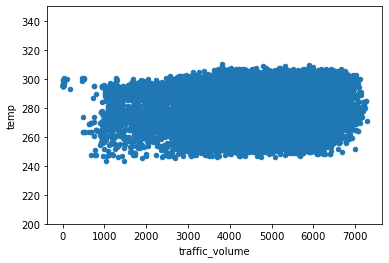

In [54]:
traffic_day.plot.scatter('traffic_volume', 'temp')
plt.ylim(200, 350)
plt.show()

It seems that the strongest correlation is the positive correlation with temperature, the higher the temperature the bigger the traffic. However, the correlation strength is .128 which indicates that it is not relatively a strong correlation. With the graph, we can assume that the correlation is not strong enough to be accounted for. 

There seems to be no other category that presents a strong enough correlation to prove whether or not certain weather types affects traffic volume

In [55]:
weather_main = traffic_day.groupby('weather_main').mean()
weather_description = traffic_day.groupby('weather_description').mean()

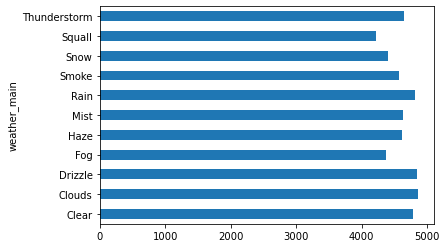

In [56]:
weather_main['traffic_volume'].plot.barh()
plt.show()

There is no category or weather that proves that there is a clear correlation on the increase or decrease of traffic volume

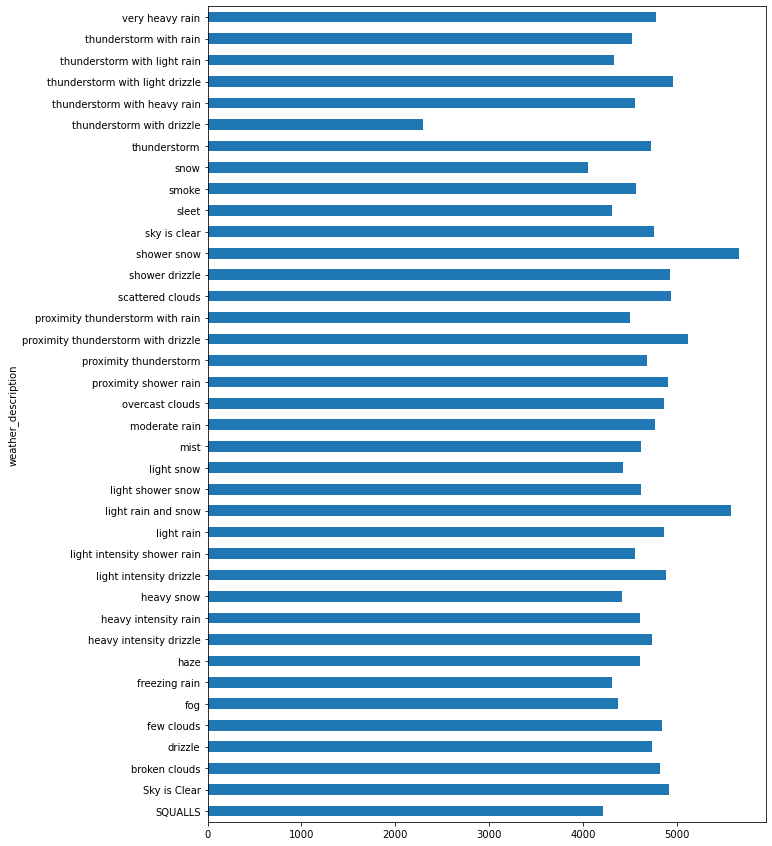

In [61]:
weather_description['traffic_volume'].plot.barh(figsize = (10, 15))
plt.show()

Shower snow, light rain and snow, and thunderstorm with light drizzle are presented as a weathertype with 5000 or more cars. This could mean road closures during bad weather which would result in single paths to where people are headed to during that day. 

# Conclusion  

We come to the conclusion that there a few indicators that cause higher amounts of traffic on the I - 94 Westbound, one indicator would be weather being that shower snow, light rain and snow, and thunderstorm with light drizzle causes more than 5000+ numbers of cars to pile up. We could also say during certain months that there are clearly more traffic, as well as more traffic being caused during certain hours of the day and certain days of the week. 
  